In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [121]:
pdata = pd.read_csv("diabetes.csv")

In [122]:
pdata.shape

(768, 9)

In [123]:
pdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
pdata.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [125]:
pdata.isnull().values.any()

False

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>],
       [<AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

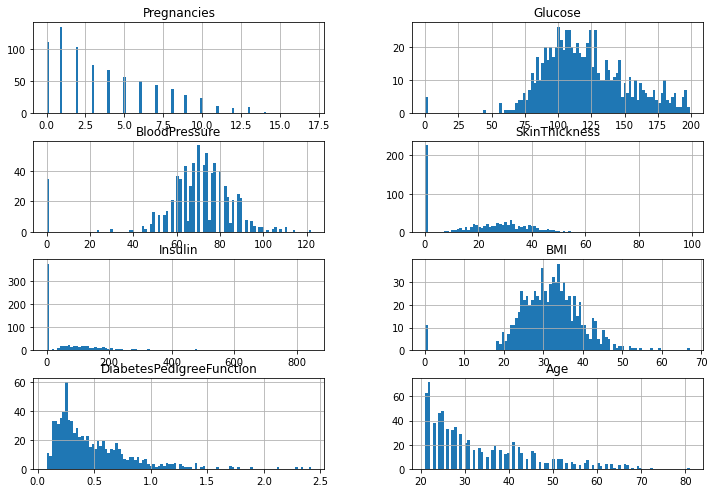

In [126]:
columns = list(pdata)[0:-1]
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30),layout=(14,2))

In [127]:
pdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


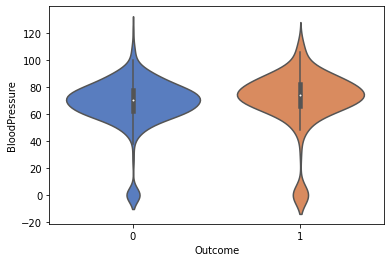

In [128]:
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=pdata, palette='muted', split=True)

In [129]:
df1 = pdata.loc[pdata['Outcome'] == 1]
df2 = pdata.loc[pdata['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
pdata = pd.concat(dataframe)

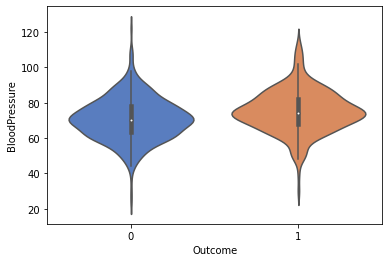

In [130]:
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=pdata, palette='muted', split=True)

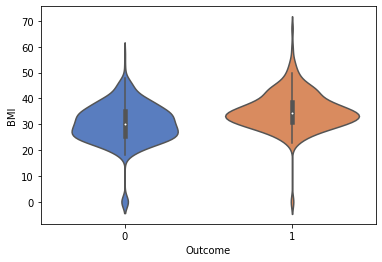

In [131]:
ax = sns.violinplot(x='Outcome', y='BMI', data=pdata, palette='muted', split=True)

In [132]:
df1B = pdata.loc[pdata['Outcome'] == 1]
df2B = pdata.loc[pdata['Outcome'] == 0]
df1B = df1B.replace({'BMI':0}, np.mean(df1B['BMI']))
df2B = df2B.replace({'BMI':0}, np.mean(df2B['BMI']))
dataframe = [df1B, df2B]
pdata = pd.concat(dataframe)

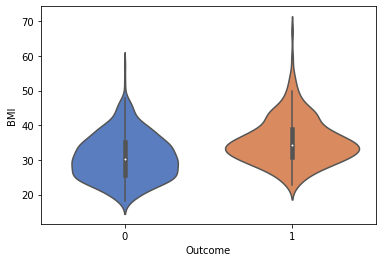

In [133]:
ax = sns.violinplot(x='Outcome', y='BMI', data=pdata, palette='muted', split=True)

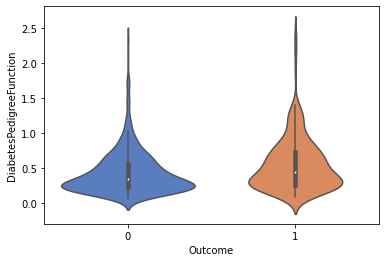

In [134]:
ax = sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=pdata, palette='muted', split=True)

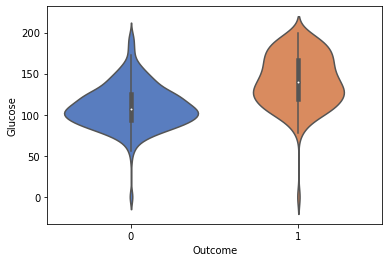

In [135]:
ax = sns.violinplot(x='Outcome', y='Glucose', data=pdata, palette='muted', split=True)

In [136]:
df1G = pdata.loc[pdata['Outcome'] == 1]
df2G = pdata.loc[pdata['Outcome'] == 0]
df1G = df1G.replace({'Glucose':0}, np.mean(df1G['Glucose']))
df2G = df2G.replace({'Glucose':0}, np.mean(df2G['Glucose']))
dataframe = [df1G, df2G]
pdata = pd.concat(dataframe)

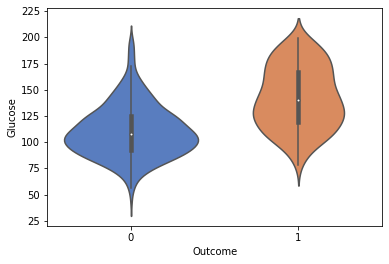

In [137]:
ax = sns.violinplot(x='Outcome', y='Glucose', data=pdata, palette='muted', split=True)

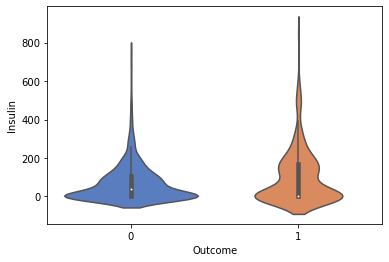

In [138]:
ax = sns.violinplot(x='Outcome', y='Insulin', data=pdata, palette='muted', split=True)

In [139]:
df1I = pdata.loc[pdata['Outcome'] == 1]
df2I = pdata.loc[pdata['Outcome'] == 0]
df1I = df1I.replace({'Insulin':0}, np.median(df1I['Insulin']))
df2I = df2I.replace({'Insulin':0}, np.median(df2I['Insulin']))
dataframe = [df1I, df2I]
pdata = pd.concat(dataframe)

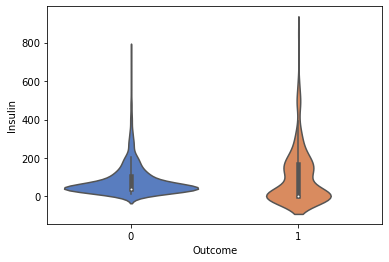

In [140]:
ax = sns.violinplot(x='Outcome', y='Insulin', data=pdata, palette='muted', split=True)

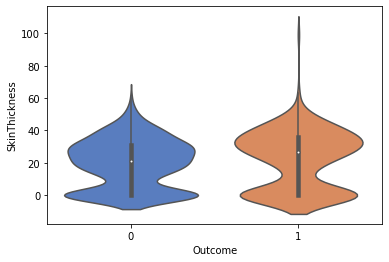

In [141]:
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=pdata, palette='muted', split=True)

In [142]:
df1S = pdata.loc[pdata['Outcome'] == 1]
df2S = pdata.loc[pdata['Outcome'] == 0]
df1S = df1S.replace({'SkinThickness':0}, np.mean(df1S['SkinThickness']))
df2S = df2S.replace({'SkinThickness':0}, np.mean(df2S['SkinThickness']))
dataframe = [df1S, df2S]
pdata = pd.concat(dataframe)

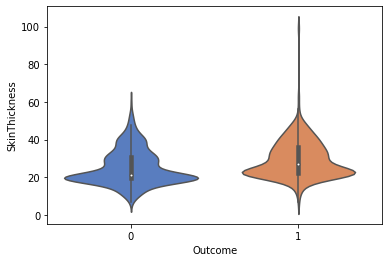

In [143]:
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=pdata, palette='muted', split=True)

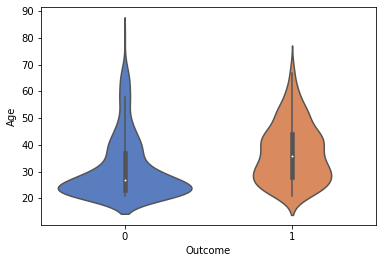

In [144]:
ax = sns.violinplot(x='Outcome', y='Age', data=pdata, palette='muted', split=True)

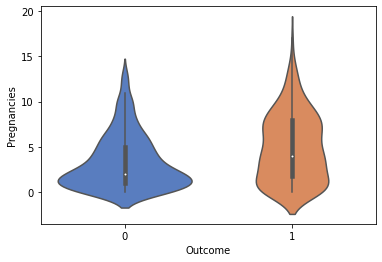

In [145]:
ax = sns.violinplot(x='Outcome', y='Pregnancies', data=pdata, palette='muted', split=True)

In [156]:
pdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691999,72.378906,26.635083,91.783854,32.439222,0.471876,33.240885,0.348958
std,3.369578,30.461151,12.104431,9.636089,108.121136,6.880449,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,19.664000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [157]:
pdata.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129898,0.209155,0.018064,-0.074531,0.024268,-0.033523,0.544341,0.221898
Glucose,0.129898,1.000000,0.224435,0.179765,0.308792,0.235818,0.138162,0.268613,0.495906
BloodPressure,0.209155,0.224435,1.000000,0.133291,-0.043125,0.286265,-0.001336,0.325306,0.173316
SkinThickness,0.018064,0.179765,0.133291,1.000000,0.258895,0.548632,0.156370,0.029980,0.213398
Insulin,-0.074531,0.308792,-0.043125,0.258895,1.000000,0.156888,0.165705,-0.033698,0.057946
BMI,0.024268,0.235818,0.286265,0.548632,0.156888,1.000000,0.152558,0.027929,0.315760
DiabetesPedigreeFunction,-0.033523,0.138162,-0.001336,0.156370,0.165705,0.152558,1.000000,0.033561,0.173844
Age,0.544341,0.268613,0.325306,0.029980,-0.033698,0.027929,0.033561,1.000000,0.238356
Outcome,0.221898,0.495906,0.173316,0.213398,0.057946,0.315760,0.173844,0.238356,1.000000


In [158]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

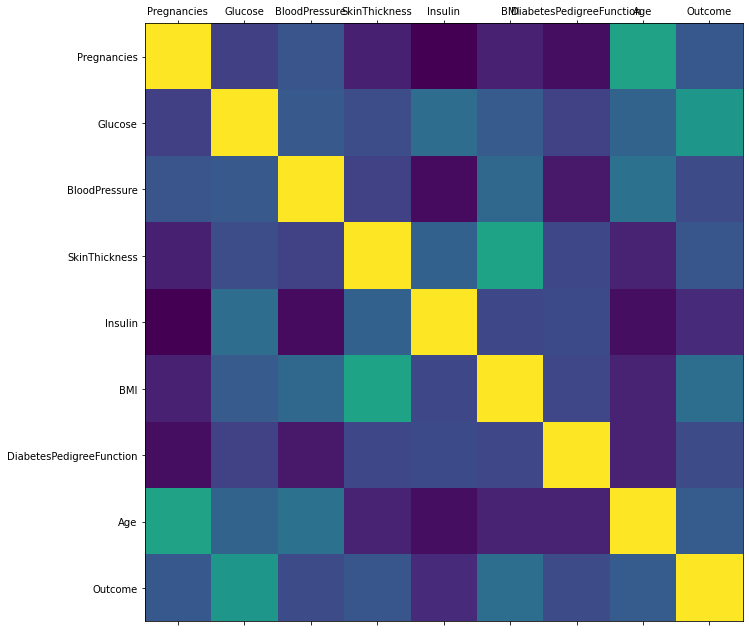

In [159]:
plot_corr(pdata)

In [147]:
n_true = len(pdata.loc[pdata['Outcome'] == True])
n_false = len(pdata.loc[pdata['Outcome'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


In [148]:
features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

X = pdata[features_cols].values
Y = pdata[predicted_class].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=52)

In [149]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

69.92% data is in training set
30.08% data is in test set


In [150]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Outcome'] == 1]), (len(pdata.loc[pdata['Outcome'] == 1])/len(pdata.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Outcome'] == 0]), (len(pdata.loc[pdata['Outcome'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 193 (35.94%)
Training Diabetes False Values   : 344 (64.06%)

Test Diabetes True Values        : 75 (32.47%)
Test Diabetes False Values       : 156 (67.53%)


In [151]:
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())

GaussianNB()

In [152]:
diab_train_predict = diab_model.predict(x_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))

Model Accuracy: 0.7598


In [153]:
diab_test_predict = diab_model.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))

Model Accuracy: 0.7403


In [154]:
print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.60      0.60      0.60        75
           0       0.81      0.81      0.81       156

    accuracy                           0.74       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



In [155]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])))

Confusion Matrix
[[ 45  30]
 [ 30 126]]
